In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
# load the data
dat = pd.read_csv('./311_clean.csv',parse_dates=[0,2])
dat.head(2)

,created,status,completed,id_311,nature,zip,x,y,ward,police district,community area,latitude,longitude
0,2011-01-01,Completed,2011-01-03,11-00001271,Garbage in alley,60618.0,1.153055e+06,1.924737e+06,35.0,17.0,16.0,41.949330,-87.712791
1,2011-01-01,Completed,2011-01-03,11-00001278,Garbage in yard,60618.0,1.154187e+06,1.920017e+06,35.0,14.0,21.0,41.936356,-87.708757


### Look at the data to see if there are issues with nans, outliers, etc.

In [5]:
dat.isnull().sum()


created               0
status                0
completed           578
id_311                0
nature             4726
zip                 119
x                    25
y                    25
ward                  4
police district       4
community area        4
latitude             25
longitude            25
dtype: int64

In [6]:
dat[dat.zip.isnull()]

,created,status,completed,id_311,nature,zip,x,y,ward,police district,community area,latitude,longitude
114,2000-01-03,Completed,2011-03-28,00-00002158,NaN,NaN,1.165167e+06,1.872509e+06,20.0,9.0,61.0,41.805763,-87.669757
115,2000-01-03,Completed,2011-03-28,00-00002178,NaN,NaN,1.163839e+06,1.872588e+06,20.0,9.0,61.0,41.806008,-87.674623
116,2000-01-03,Completed,2011-03-28,00-00002488,NaN,NaN,1.166843e+06,1.871824e+06,20.0,9.0,61.0,41.803849,-87.663626
117,2000-01-03,Completed,2011-03-28,00-00002724,NaN,NaN,1.165826e+06,1.872636e+06,20.0,9.0,61.0,41.806098,-87.667336
118,2000-01-03,Completed,2011-03-28,00-00004301,NaN,NaN,1.165160e+06,1.872757e+06,20.0,9.0,61.0,41.806443,-87.669775
259,2011-01-04,Completed,2011-01-05,11-00014096,Dog feces in yard,NaN,1.132466e+06,1.863009e+06,23.0,8.0,64.0,41.780324,-87.789912
355,2000-01-05,Completed,2011-03-28,00-00013773,NaN,NaN,1.181967e+06,1.863813e+06,20.0,3.0,42.0,41.781527,-87.608410
584,2000-01-07,Completed,2011-03-28,00-00025328,NaN,NaN,1.163839e+06,1.872588e+06,20.0,9.0,61.0,41.806008,-87.674623
765,2000-01-11,Completed,2011-03-28,00-00040514,NaN,NaN,1.177655e+06,1.868401e+06,20.0,2.0,40.0,41.794218,-87.624077
889,2000-01-10,Completed,2011-03-28,00-00036302,NaN,NaN,1.164467e+06,1.873512e+06,20.0,9.0,61.0,41.808530,-87.672295


In [7]:
# The ward, district, and community area nans go together
dat[dat.ward.isnull()]

,created,status,completed,id_311,nature,zip,x,y,ward,police district,community area,latitude,longitude
26710,2011-08-09,Completed,2011-08-29,11-03561290,Overflowing carts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43174,2013-05-18,Completed,2013-05-28,13-00600499,NaN,60651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43176,2013-05-18,Completed,2013-05-28,13-00601141,NaN,60624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43206,2013-05-17,Completed,2013-05-28,13-00598015,NaN,60612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# The x, y, lat, and long nans go together
dat[dat.x.isnull()]

,created,status,completed,id_311,nature,zip,x,y,ward,police district,community area,latitude,longitude
261,2013-06-08,Completed,2013-07-05,13-00720141,Other,60651.0,NaN,NaN,27.0,11.0,23.0,NaN,NaN
433,2012-01-05,Completed,2012-01-05,12-00020507,Garbage in alley,60629.0,NaN,NaN,15.0,8.0,66.0,NaN,NaN
3432,2012-02-08,Completed,2012-03-07,12-00174358,NaN,60636.0,NaN,NaN,15.0,7.0,67.0,NaN,NaN
19318,2011-06-14,Completed,2011-06-20,11-02920667,Garbage in yard,60629.0,NaN,NaN,15.0,8.0,66.0,NaN,NaN
26710,2011-08-09,Completed,2011-08-29,11-03561290,Overflowing carts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41392,2013-04-25,Completed,2013-04-29,13-00485619,NaN,60624.0,NaN,NaN,27.0,11.0,23.0,NaN,NaN
42487,2013-04-18,Completed,2013-05-17,13-00446791,Standing water,60657.0,NaN,NaN,44.0,19.0,6.0,NaN,NaN
43021,2013-05-18,Completed,2013-05-25,13-00599956,NaN,60612.0,NaN,NaN,27.0,12.0,27.0,NaN,NaN
43027,2013-05-15,Completed,2013-05-25,13-00584013,Other,60651.0,NaN,NaN,27.0,25.0,23.0,NaN,NaN
43174,2013-05-18,Completed,2013-05-28,13-00600499,NaN,60651.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# When the completed dates are present, the complaint is closed
dat.status[dat.completed.notnull()].unique()

array(['Completed', 'Completed - Dup'], dtype=object)

In [10]:
# When the completed dates are missing, the complaint is still open
dat.status[dat.completed.isnull()].unique()

array(['Open', 'Open - Dup'], dtype=object)

In [11]:
# There seem to be 51 wards, 0 through 50
a = dat.ward.unique()
a.sort()
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  nan])

In [12]:
# There seem to be 27 police districts, 0 through 25 plus 31
a = dat['police district'].unique()
a.sort()
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  31.,  nan])

In [13]:
# There seem to be 78 community areas, 0 through 77
a = dat['community area'].unique()
a.sort()
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  nan])

In [14]:
print 'Counts in each ward:'
print dat.groupby(['ward']).size().values
print 'Counts in each Police District:'
print dat.groupby(['police district']).size().values
print 'Counts in each Community Area:'
print dat.groupby(['community area']).size().values

Counts in each ward:
[   3 2481 1878 1777  983 1509 4569 3790 2890 3021 1534 2482 1231 1563 2443
 2592 2391 3814 3541 1286 2512 4530 1348 1774 2859 1760 2641 2904 3403 1903
 1897 1938 4165 2011 2926 2755 1767 2579 1711 1929 1693 1442 1022 2851 1478
 1868 1450 1498  799 1188 1911]
Counts in each Police District:
[    9   984  2547  4406  6881  4563  7152  5967 10279  5928  3855  5017
  4491   997  6327  3113  5835  5454  2890  6997  2121   239  5078   372
  3652  7134     2]
Counts in each Community Area:
[   3 1337 2412 1538 1062 1382 2706 3516 1185  261 1288  731  391  679 1564
 2169 2459 1212  371 2397 1048 1696 3703 3293 4241 4858 1336 1634 1751 2195
 1615 1273  576  283  365  452  105  189 1049  324  509  365 1346 3067 2261
  603 1974  241  903 2890  269  960  476 2104  100  258 1187 1160 1174  646
 1517 1895  551 1019  679  854 2906 3230 2423 2818 2130 4017  529 2225  428
  865  160  902]


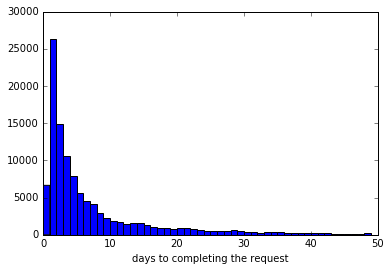

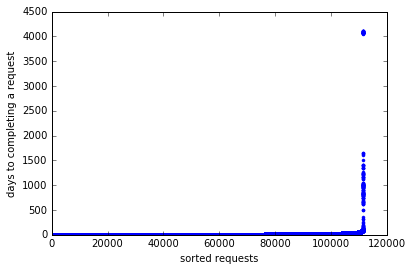

In [15]:
# a few requests take a few years
# Most take a few days to a few weeks.
def days(x):
    try: 
        return x.days
    except:
        return np.NaN

a = (dat.completed-dat.created).map(days).values
a = a[~np.isnan(a)]
plt.hist(a,bins=np.arange(0,50))
plt.xlabel('days to completing the request')
plt.show()

a.sort()
plt.plot(a,'.')
plt.ylabel('days to completing a request')
plt.xlabel('sorted requests')
plt.show()

In [16]:
dat.describe()

,zip,x,y,ward,police district,community area,latitude,longitude
count,112175.000000,1.122690e+05,1.122690e+05,112290.000000,112290.000000,112290.000000,112269.000000,112269.000000
mean,60629.727569,1.162765e+06,1.887323e+06,23.847742,12.383783,37.316092,41.846451,-87.678197
std,256.515459,1.585567e+04,3.365439e+04,13.511281,6.802050,22.963702,0.092544,0.057643
min,0.000000,1.100851e+06,1.814178e+06,0.000000,0.000000,0.000000,41.645369,-87.904514
25%,60619.000000,1.152006e+06,1.856882e+06,12.000000,7.000000,19.000000,41.762639,-87.717213
50%,60628.000000,1.163297e+06,1.891024e+06,24.000000,11.000000,31.000000,41.856631,-87.676009
75%,60642.000000,1.172739e+06,1.916534e+06,34.000000,18.000000,60.000000,41.926717,-87.641648
max,60827.000000,1.204795e+06,1.951492e+06,50.000000,31.000000,77.000000,42.022534,-87.525749


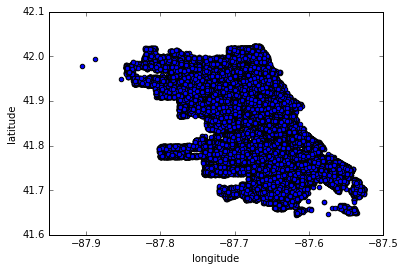

In [17]:
# Spatial distribution of complaints
dat.plot.scatter('longitude','latitude')
print ' '